In [ ]:
from random import sample
from pathlib import Path

import matplotlib.pyplot as plt
from pathlib import Path
from easyocr import Reader

from utils.model import Detector
from utils.data import get_transform, ID2LABELS, read_image,xyxy2xywh, show_boxes
from utils.series import expand_box, words_crop_to_text, nums_crop_to_text, parse_boxes

In [4]:
annot_dir = "datasets/benetech/annotations/"
annots = [str(i) for i in Path(annot_dir).glob("*.json")]
print(len(annots))

498


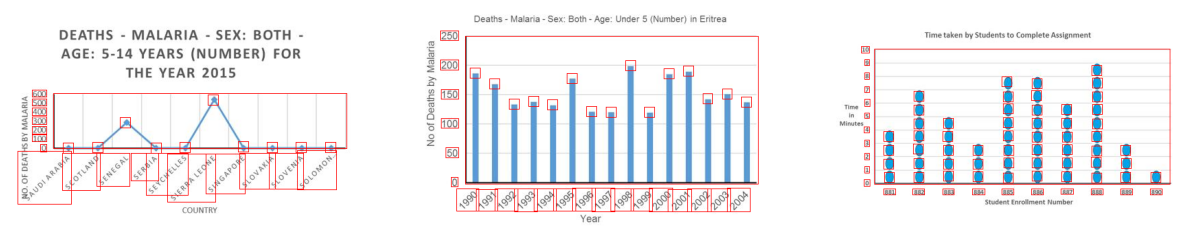

In [6]:

# check plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
idxs = sample(range(len(annots)), 3)

show_boxes(json_file=annots[idxs[0]], ax=axs[0])
show_boxes(json_file=annots[idxs[1]], ax=axs[1])
show_boxes(json_file=annots[idxs[2]], ax=axs[2])


In [2]:
weights = "models/model.pt"
model = Detector(weights=weights, transforms=get_transform())
model

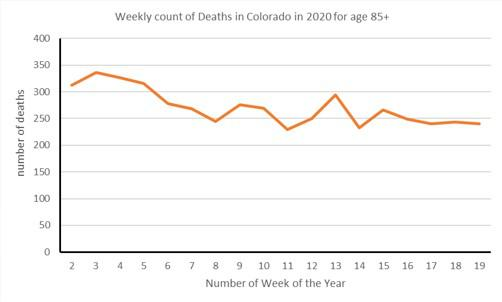

In [3]:
img_file = "assets/line.jpg"
img = read_image(img_file)
img

In [5]:
res = model(img)[0]
boxes = res["boxes"].detach().tolist()
labels = res["labels"]

In [7]:
data = parse_boxes(boxes, labels)
chart_type = data["chart_type"]
xboxes = [xyxy2xywh(i) for i in data["x_ticks"]]
yboxes = [xyxy2xywh(i) for i in data["y_ticks"]]
ID2LABELS.get(chart_type)

'line'

In [10]:
reader = Reader(["en"])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
x_texts = [words_crop_to_text(expand_box(i), img, reader) for i in xboxes]
print(x_texts)

In [ ]:
y_texts = [nums_crop_to_text(expand_box(i), img, reader) for i in yboxes]
print(y_texts)